<a href="https://colab.research.google.com/github/SwaXTech/Simulacion-EaE/blob/main/tp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico #6



In [ ]:
#@title Imports de bibliotecas necesarias
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
#@title Descarga del archivo de TimeStamps
!curl -L -o timestamps.csv -C - 'https://download1514.mediafire.com/yf6fd2xz2hhg/inny38fb8o5dwur/timestamps.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 42232    0 42232    0     0  34334      0 --:--:--  0:00:01 --:--:-- 3371k


In [ ]:
#@title Carga del archivo de timestamps
serie = pd.read_csv('timestamps.csv')
serie

ParserError: ignored

In [ ]:
datetime_serie = serie['TimeStamp'].map(lambda timestamp: datetime.strptime(timestamp, '%m/%d/%Y %H:%M:%S'))
datetime_serie_am = datetime_serie[:11202]
datetime_serie_pm = datetime_serie[11202:]

datetime_serie_pm

11202   2021-09-14 12:00:08
11203   2021-09-14 12:00:09
11204   2021-09-14 12:00:09
11205   2021-09-14 12:00:11
11206   2021-09-14 12:00:11
                ...        
32822   2021-09-14 11:59:31
32823   2021-09-14 11:59:44
32824   2021-09-14 11:59:47
32825   2021-09-14 11:59:58
32826   2021-09-14 11:59:58
Name: TimeStamp, Length: 21625, dtype: datetime64[ns]

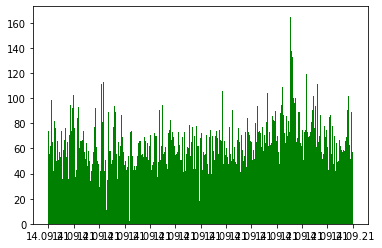

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

fig, ax = plt.subplots(1,1)
ax.hist(datetime_serie, bins=500, color='green')
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))

fig.show()

In [ ]:
dictionary = {}

for date in datetime_serie_am:
  hour = date.hour

  if date.hour == 12:
    hour = 0

  if hour in dictionary.keys():
    dictionary[hour] +=1
  else:
    dictionary[hour] = 0

for date in datetime_serie_pm:
  
  hour = date.hour

  if not date.hour == 12:
     hour += 12

  if hour in dictionary.keys():
    dictionary[hour] +=1
  else:
    dictionary[hour] = 0

dictionary

{0: 777,
 1: 423,
 2: 283,
 3: 239,
 4: 287,
 5: 408,
 6: 516,
 7: 962,
 8: 1242,
 9: 1555,
 10: 2292,
 11: 2206,
 12: 1954,
 13: 2318,
 14: 2204,
 15: 2319,
 16: 2039,
 17: 2268,
 18: 1909,
 19: 1599,
 20: 1325,
 21: 1369,
 22: 1285,
 23: 1024}

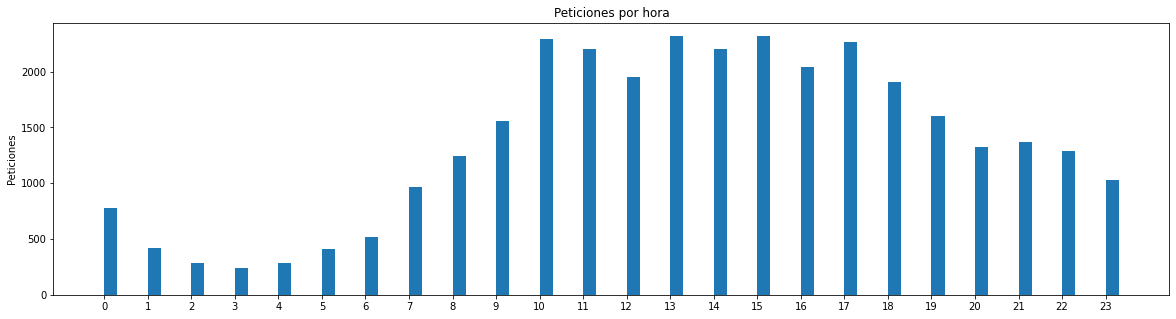

In [ ]:
objects = dictionary.keys()
y_pos = np.arange(len(objects))
values = dictionary.values()

plt.figure(figsize=(20, 5))
plt.bar(y_pos, values, align='edge', width=0.3)
plt.xticks(y_pos, objects)
plt.ylabel('Peticiones')
plt.title('Peticiones por hora')

plt.show()